In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [2]:
ds=pd.read_csv('baseball.csv')

In [3]:
ds.head()


,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [4]:
ds.shape

(30, 17)

In [5]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


# checking the null values in the dataframe

In [6]:
ds.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

no null values in the dataframe

<AxesSubplot:>

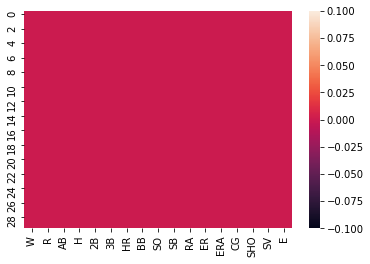

In [7]:
# checking tne null values through heatmap
sns.heatmap(ds.isnull())

# checking datatypes of the columns

In [8]:
ds.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

ERA is the float type column and remaining all the column is of integer data type

In [9]:
ds.dtypes.unique()

array([dtype('int64'), dtype('float64')], dtype=object)

showing integer types columns

In [10]:
int_col=[]

for x in ds.dtypes.index:
    if ds.dtypes[x]=='int64':
        int_col.append(x)
        
int_col


['W',
 'R',
 'AB',
 'H',
 '2B',
 '3B',
 'HR',
 'BB',
 'SO',
 'SB',
 'RA',
 'ER',
 'CG',
 'SHO',
 'SV',
 'E']

here 'W' column is out target column.

# checking unique values in the columns

In [11]:
ds['CG'].unique()

array([ 2, 11,  7,  3,  0,  1,  5,  6,  4], dtype=int64)

we have 9 unique values is 'CG' columns

In [12]:
ds['SV'].unique()

array([56, 45, 38, 37, 35, 34, 48, 43, 60, 40, 39, 46, 28, 62, 54, 50, 41,
       44, 47, 36], dtype=int64)

we have 20 unique values is 'SV' columns

In [13]:
ds['SHO'].unique()

array([ 8, 12, 10,  9,  4, 13, 15, 21,  7, 14, 18,  6], dtype=int64)

we have 12 unique values in 'SHO' columns


in other columns,many values is lying there so not checking uniqueness


# checking the values counts of the columns

In [14]:
for col in ds:
    print(col)
    print(ds[col].value_counts())
    print()

W
68     3
83     2
74     2
76     2
81     2
64     1
93     1
92     1
90     1
88     1
87     1
86     1
85     1
84     1
80     1
97     1
100    1
78     1
63     1
79     1
71     1
67     1
98     1
95     1
Name: W, dtype: int64

R
696    2
689    2
640    1
644    1
720    1
573    1
764    1
891    1
697    1
694    1
626    1
751    1
622    1
748    1
683    1
613    1
737    1
669    1
667    1
729    1
661    1
724    1
656    1
655    1
650    1
713    1
647    1
703    1
Name: R, dtype: int64

AB
5485    2
5571    1
5605    1
5491    1
5565    1
5457    1
5428    1
5420    1
5567    1
5480    1
5439    1
5484    1
5417    1
5544    1
5527    1
5572    1
5600    1
5533    1
5467    1
5529    1
5463    1
5459    1
5649    1
5511    1
5385    1
5640    1
5575    1
5509    1
5631    1
Name: AB, dtype: int64

H
1363    2
1346    1
1374    1
1462    1
1397    1
1395    1
1479    1
1324    1
1515    1
1386    1
1383    1
1382    1
1381    1
1379    1
1378    1
1370    1
134

# visualization of dataframe

1     7
2     4
7     4
0     3
3     3
5     3
6     3
4     2
11    1
Name: CG, dtype: int64


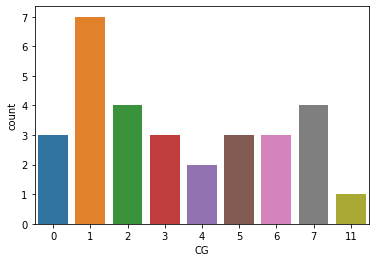

In [15]:
# through count plot
ax=sns.countplot(x='CG',data=ds)
print(ds['CG'].value_counts())

in'CG' columns only yellow clolred bar is showing maximum number of counts and green colored bar is showing minimum number of counts, that is 7 and 1 respectively. other than that all the bsrs are normally distributed not much noticable difference between them

12    7
10    5
13    3
4     2
7     2
8     2
9     2
15    2
21    2
6     1
14    1
18    1
Name: SHO, dtype: int64


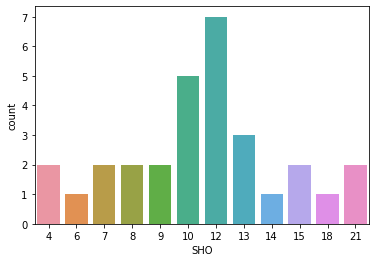

In [16]:
# through count plot
ax=sns.countplot(x='SHO',data=ds)
print(ds['SHO'].value_counts())

the total number unique values in 'SHO' column is 12, and the bar showing on 12 is of maximum number of counts that is 7, and the bar showing on the 10 is the count of 5. other than that all the bars are normally distributed, not much noticable difference between them

# bivariate analysis

In [17]:
ds.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

<AxesSubplot:title={'center':'comparison between R and W'}, xlabel='R', ylabel='W'>

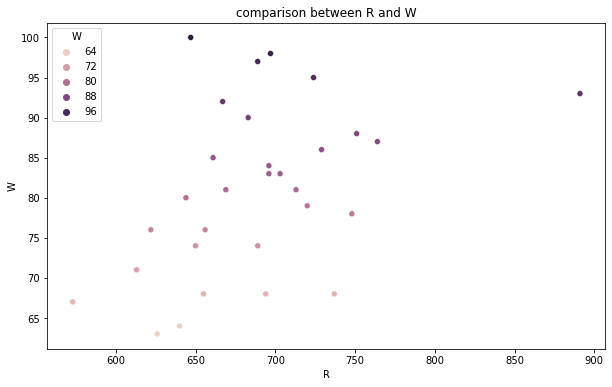

In [18]:
plt.figure(figsize=[10,6])
plt.title('comparison between R and W')
sns.scatterplot(ds['R'],ds['W'],hue=ds['W'])

scatter plot showing the positive comparison with an outlier

<AxesSubplot:title={'center':'comparison between AB and W'}, xlabel='AB', ylabel='W'>

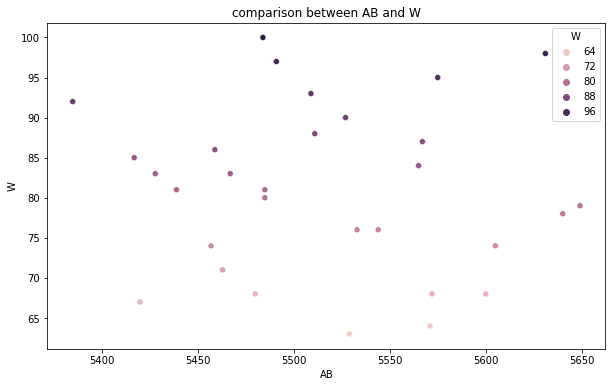

In [19]:
plt.figure(figsize=[10,6])
plt.title('comparison between AB and W')
sns.scatterplot(ds['AB'],ds['W'],hue=ds['W'])

scatter plot showing positivity with spreadness

<AxesSubplot:title={'center':'comparison between H and W'}, xlabel='H', ylabel='W'>

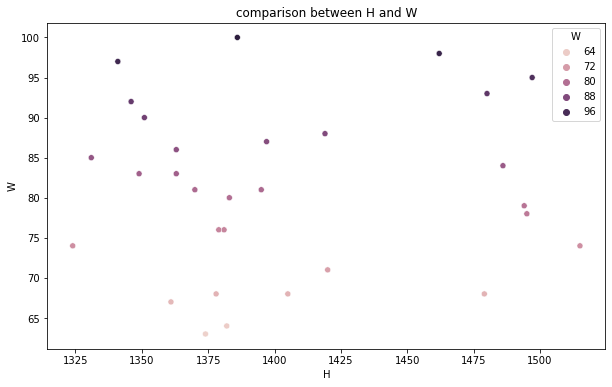

In [20]:
plt.figure(figsize=[10,6])
plt.title('comparison between H and W')
sns.scatterplot(ds['H'],ds['W'],hue=ds['W'])


in this scatterplot data is very spread.


<AxesSubplot:title={'center':' comparison between 2B and W'}, xlabel='2B', ylabel='W'>

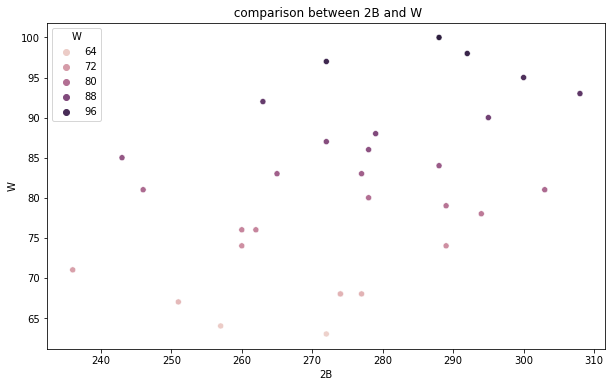

In [21]:
plt.figure(figsize=[10,6])
plt.title(' comparison between 2B and W')
sns.scatterplot(ds['2B'],ds['W'],hue=ds['W'])

in this scatter plot data is spreaded with positive comparison

<AxesSubplot:title={'center':'comparison between 3B and W'}, xlabel='3B', ylabel='W'>

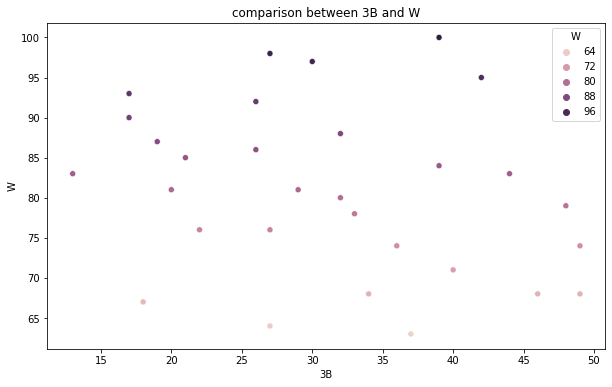

In [22]:
plt.figure(figsize=[10,6])
plt.title('comparison between 3B and W')
sns.scatterplot(ds['3B'],ds['W'],hue=ds['W'])

spreadness of the data is present in the scatter plot

<AxesSubplot:title={'center':'comparison between HR and W'}, xlabel='HR', ylabel='W'>

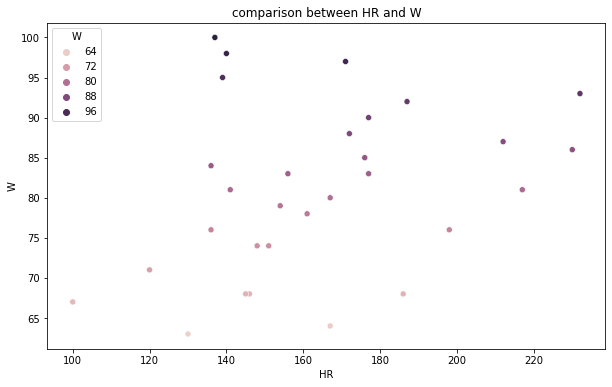

In [23]:
plt.figure(figsize=[10,6])
plt.title('comparison between HR and W')
sns.scatterplot(ds['HR'],ds['W'],hue=ds['W'])

in this scatterplot data is spreaded with positivily

<AxesSubplot:title={'center':'comparison between happiness BB and W'}, xlabel='BB', ylabel='W'>

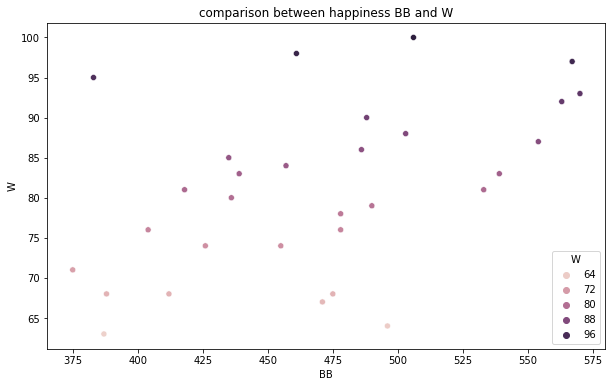

In [24]:
plt.figure(figsize=[10,6])
plt.title('comparison between happiness BB and W')
sns.scatterplot(ds['BB'],ds['W'],hue=ds['W'])

positive comparison between 'BB and 'W'

<AxesSubplot:title={'center':'comparison between SO and W'}, xlabel='SO', ylabel='W'>

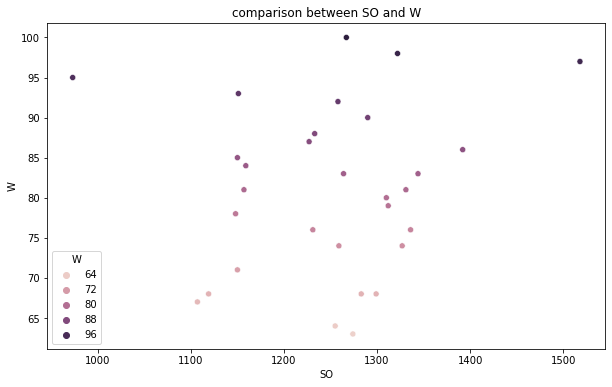

In [25]:
plt.figure(figsize=[10,6])
plt.title('comparison between SO and W')
sns.scatterplot(ds['SO'],ds['W'],hue=ds['W'])

scatter plot is showing comparison having an outlier

<AxesSubplot:title={'center':'comparison between SB and W'}, xlabel='SB', ylabel='W'>

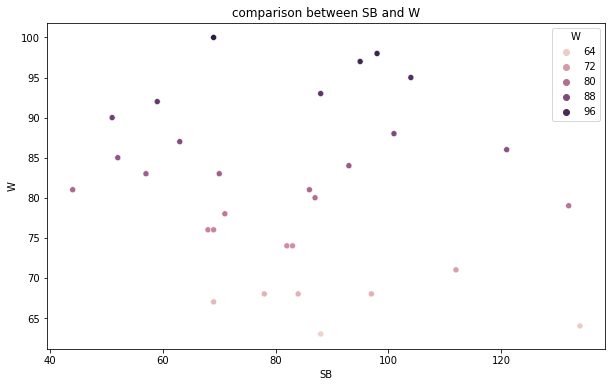

In [26]:
plt.figure(figsize=[10,6])
plt.title('comparison between SB and W')
sns.scatterplot(ds['SB'], ds['W'],hue=ds['W'])

data is spreaded in this scatter plot

<AxesSubplot:title={'center':'comparison between RA and W'}, xlabel='RA', ylabel='W'>

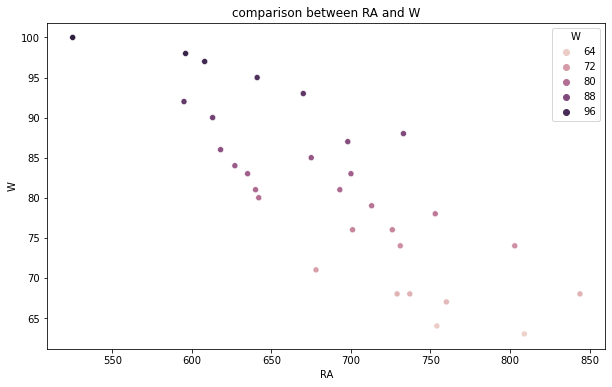

In [27]:
plt.figure(figsize=[10,6])
plt.title('comparison between RA and W')
sns.scatterplot(ds['RA'],ds['W'],hue=ds['W'])

scatter plot is showing negativity between 'RA' and 'W'

<AxesSubplot:title={'center':'comparison between ER and W'}, xlabel='ER', ylabel='W'>

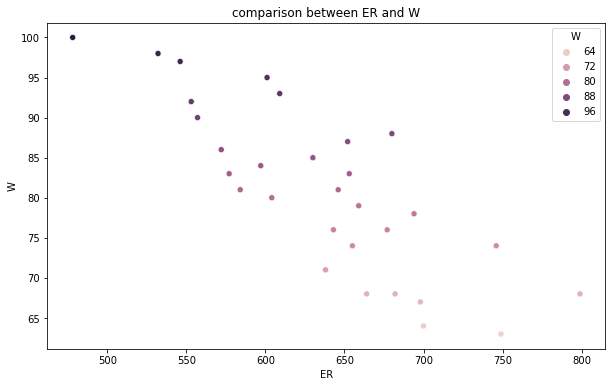

In [28]:
plt.figure(figsize=[10,6])
plt.title('comparison between ER and W')
sns.scatterplot(ds['ER'],ds['W'],hue=ds['W'])


negative comparison between 'ER' and 'W'

<AxesSubplot:title={'center':'comparison between ERA and W'}, xlabel='ERA', ylabel='W'>

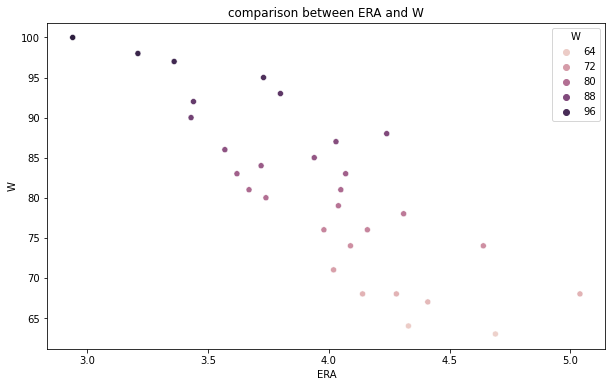

In [29]:
plt.figure(figsize=[10,6])
plt.title('comparison between ERA and W')
sns.scatterplot(ds['ERA'],ds['W'],hue=ds['W'])

negative comparison

<AxesSubplot:title={'center':'comparison between CG and w'}, xlabel='CG', ylabel='W'>

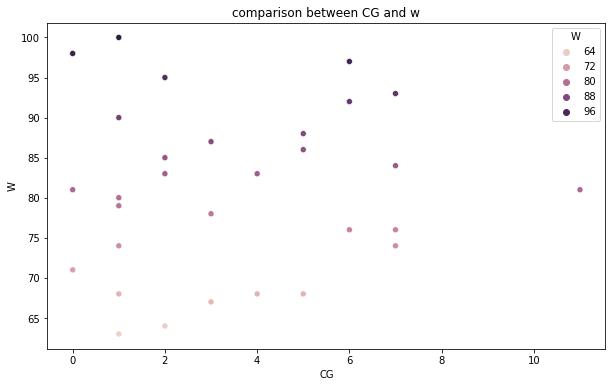

In [30]:
plt.figure(figsize=[10,6])
plt.title('comparison between CG and w')
sns.scatterplot(ds['CG'],ds['W'],hue=ds['W'])

little positive comparison

<AxesSubplot:title={'center':'comparison between SHO and W'}, xlabel='SHO', ylabel='W'>

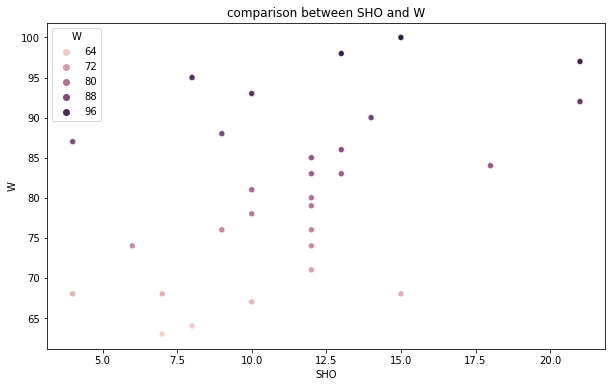

In [31]:
plt.figure(figsize=[10,6])
plt.title('comparison between SHO and W')
sns.scatterplot(ds['SHO'],ds['W'],hue=ds['W'])

positive comparison

<AxesSubplot:title={'center':'comparison between SV and W'}, xlabel='SV', ylabel='W'>

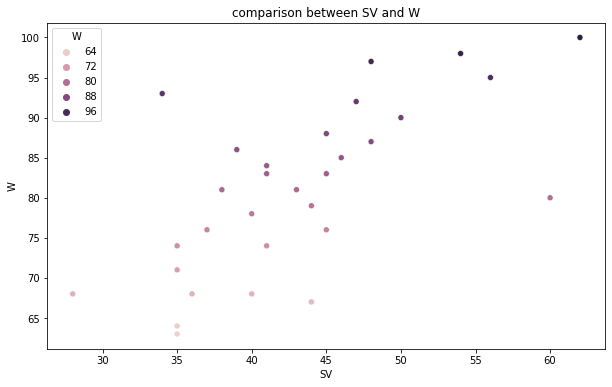

In [32]:
plt.figure(figsize=[10,6])
plt.title('comparison between SV and W')
sns.scatterplot(ds['SV'],ds['W'],hue=ds['W'])

positive resposne between both

<AxesSubplot:title={'center':'comparison between E and W'}, xlabel='E', ylabel='W'>

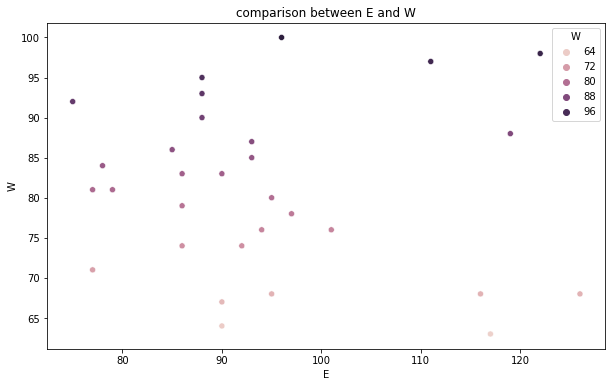

In [39]:
plt.figure(figsize=[10,6])
plt.title('comparison between E and W')
sns.scatterplot(ds['E'],ds['W'],hue=ds['W'])

spreadness result

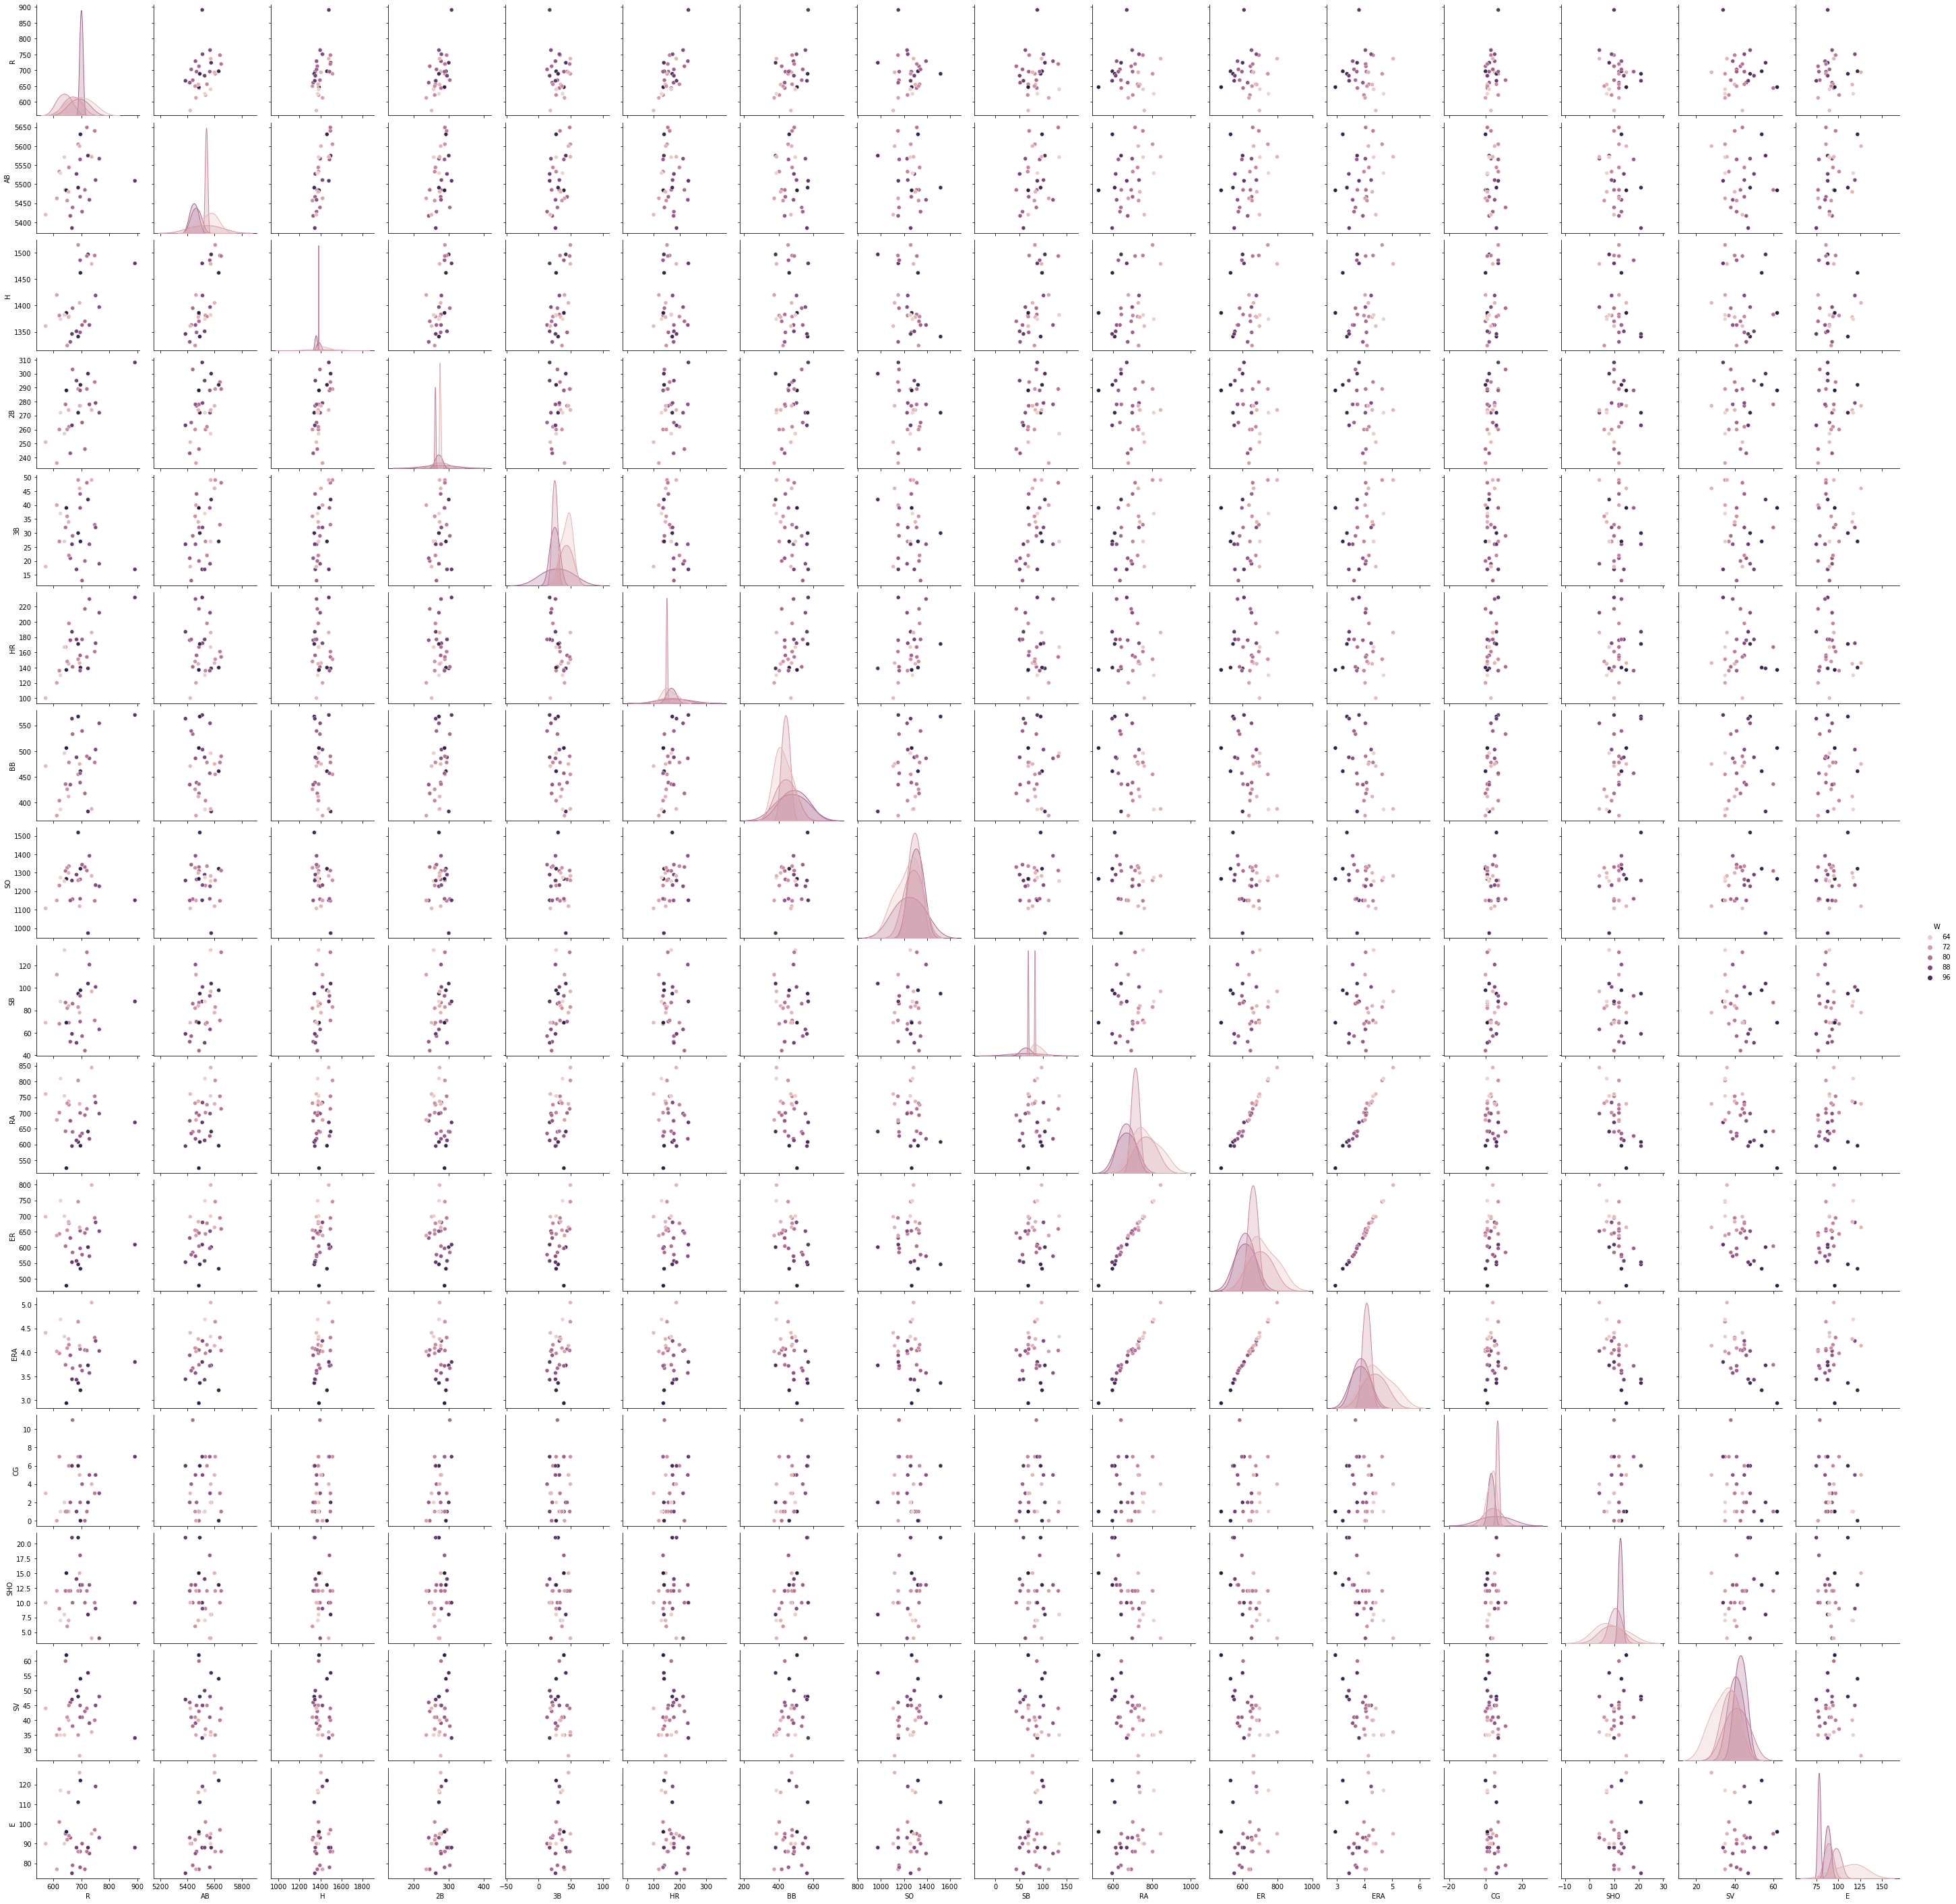

In [40]:
sns.pairplot(ds,hue='W')

statistical summary

In [41]:
ds.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


<AxesSubplot:>

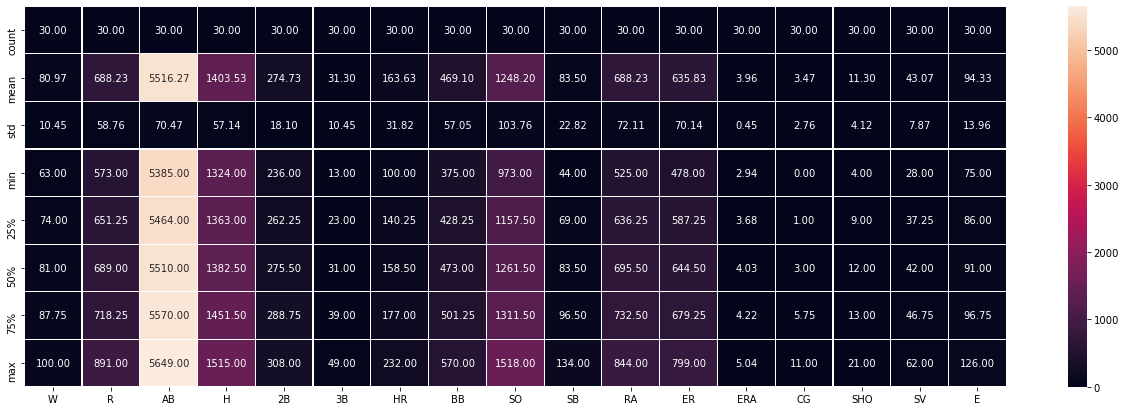

In [42]:
import matplotlib.pyplot as plt
plt.figure(figsize=(22,7))
sns.heatmap(ds.describe(),annot=True,linewidths=0.1,fmt='0.2f')

Mean and Median is approx same in every column.

since we have no missing values in the data frame,so value counts is same for all the columns.
not much difference between 75th percentile and Maximum in any of the columns.

# Colleration Matrix

In [43]:
cor=ds.corr()
cor

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
R,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AB,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
H,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
3B,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HR,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
BB,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
SO,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
SB,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


<AxesSubplot:>

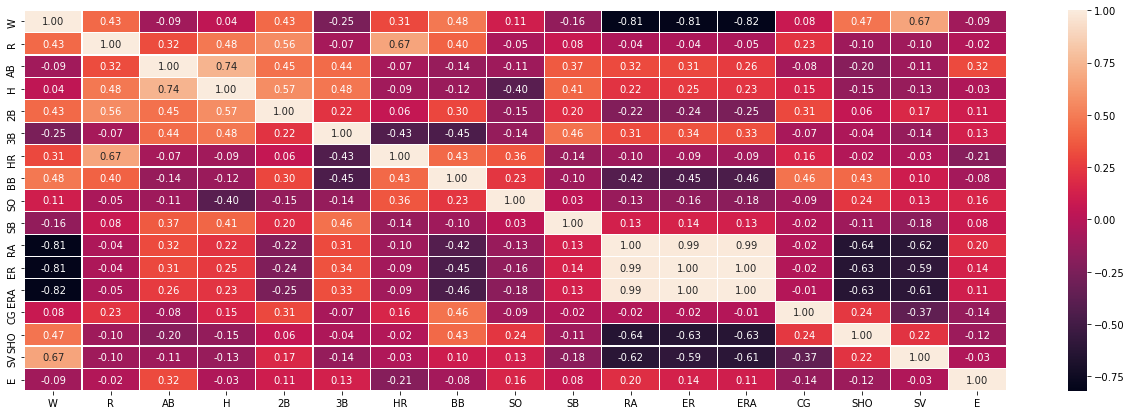

In [44]:
plt.figure(figsize=(22,7))
sns.heatmap(ds.corr(),annot=True,linewidths=0.1,fmt='0.2f')

sv columns is showing positive correlation with W
SHO column is showing some positive correlation with W.
R and 2B column is showing some positive correlation with W.
BB column is showing positive correlation with W.
RA ER and ERA columns is showing negative correlation with W.

# checking the columns which are positivly and negative correlated with the target columns

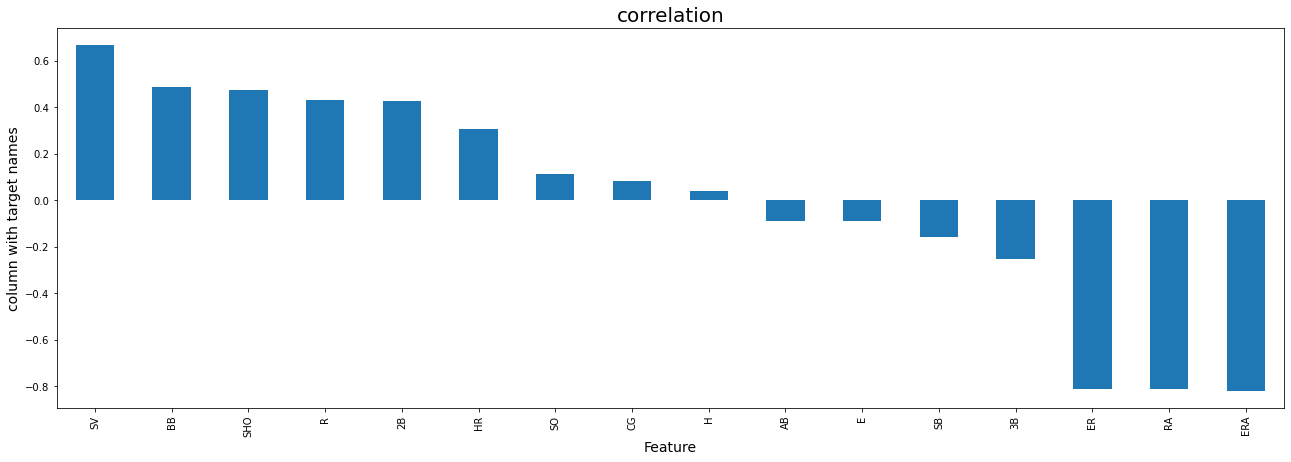

In [45]:
plt.figure(figsize=(22,7))
ds.corr()['W'].sort_values(ascending=False).drop(['W']).plot(kind='bar')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=20)
plt.show()

ER RA and ERA is showing negative correlation with W.
we can say all the columns is showing correlation with W

# checking skewness

In [46]:
ds.skew()

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

columns is in range between +.5 and -.5 are not skewed
skewed columns are:
    R, H, CG, SV

# checking outliers

In [47]:
ds.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

<AxesSubplot:>

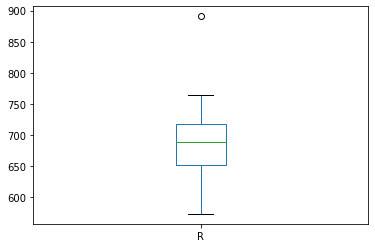

In [48]:
ds['R'].plot.box()

outlier is present in this column.

<AxesSubplot:>

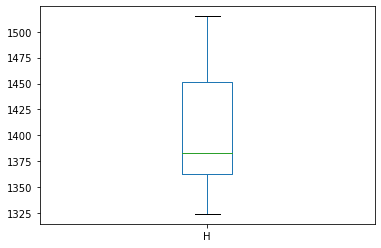

In [51]:
ds['H'].plot.box()

outlier is not present in this column

<AxesSubplot:>

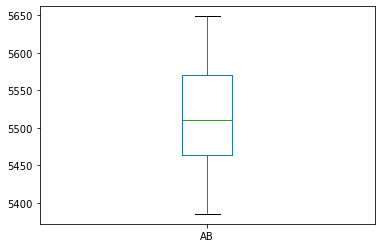

In [50]:
ds['AB'].plot.box()

outlier is not present in this column

<AxesSubplot:>

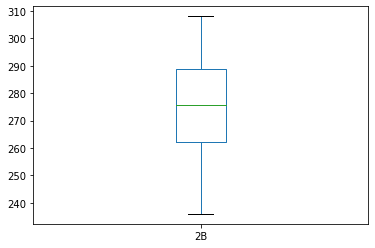

In [52]:
ds['2B'].plot.box()

outlier is not present in this column.

<AxesSubplot:>

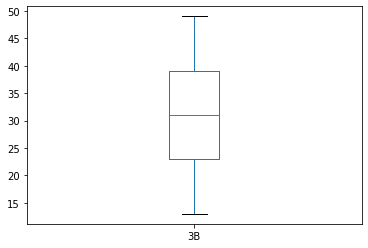

In [53]:
ds['3B'].plot.box()

outlier is not present in this column.

<AxesSubplot:>

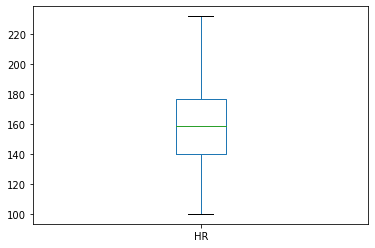

In [54]:
ds['HR'].plot.box()

outlier is not present in this column

<AxesSubplot:>

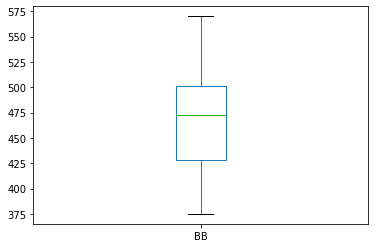

In [56]:
ds['BB'].plot.box()

outlier is not present in this column

<AxesSubplot:>

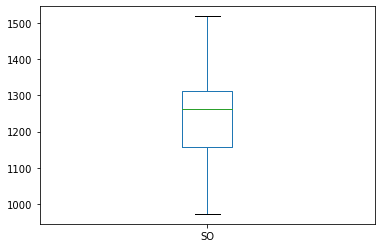

In [57]:
ds['SO'].plot.box()

outlier is not present in this column

<AxesSubplot:>

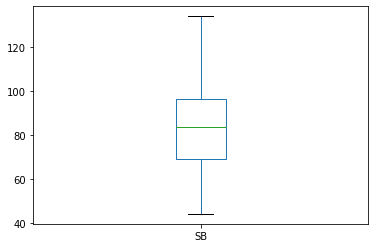

In [58]:
ds['SB'].plot.box()

outlier is not present is this column

<AxesSubplot:>

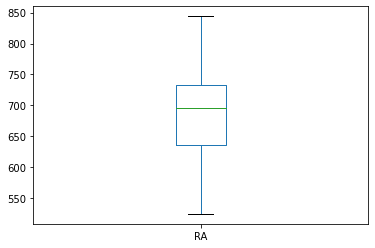

In [59]:
ds['RA'].plot.box()

outlier not present 

<AxesSubplot:>

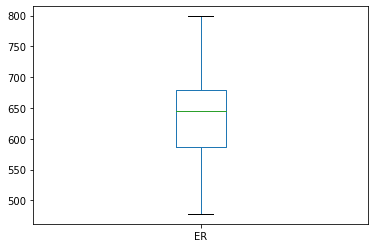

In [60]:
ds['ER'].plot.box()

outlier is not present in this column

ds['ERA'].plot.box()

outlier present

<AxesSubplot:>

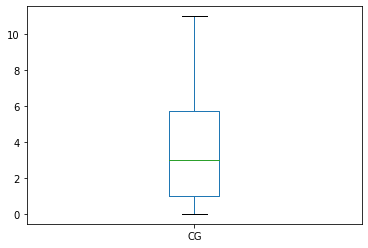

In [64]:
ds['CG'].plot.box()

outlier not present

<AxesSubplot:>

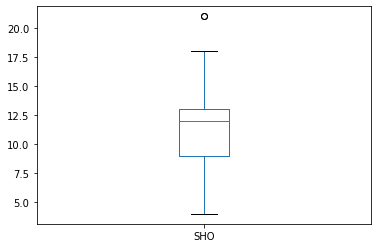

In [66]:
ds['SHO'].plot.box()

outlier present

<AxesSubplot:>

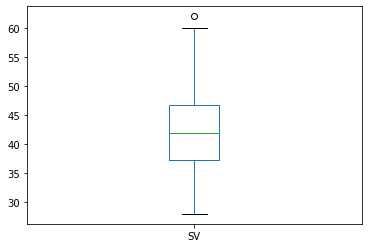

In [67]:
ds['SV'].plot.box()

outlier is very close

<AxesSubplot:>

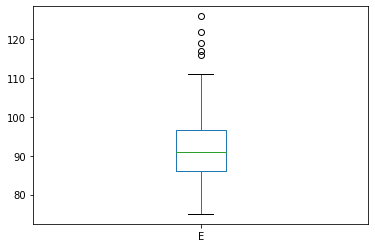

In [68]:
ds['E'].plot.box()

some ourlier are present 

# outlier removal

In [69]:
ds.shape

(30, 17)

In [70]:
from scipy.stats import zscore

In [71]:
z=np.abs(zscore(ds))
threshold=3
np.where(z>3)

(array([5], dtype=int64), array([1], dtype=int64))

In [73]:
ds_new_z=ds[(z<3).all(axis=1)]
ds_new_z

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97
10,88,751,5511,1419,279,32,172,503,1233,101,733,680,4.24,5,9,45,119


In [74]:
ds_new_z.shape

(29, 17)

one row has been removed as a outlier

# removing skewness

In [75]:
ds_new_z.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.783772
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG     0.854980
SHO    0.526943
SV     0.627480
E      0.840271
dtype: float64

since outlier has been removed then automatically some skewness has removed

# seprating the columns into features and target

In [76]:
x=ds_new_z.drop('W',axis=1)
y=ds_new_z['W']

In [77]:
x.shape

(29, 16)

In [78]:
y.shape

(29,)

# lets bring all feature to a common scale

In [82]:
# lets bring all features to a common scale

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(ds_new_z)

x=pd.DataFrame(x,columns=ds_new_z.columns)

# train test split

In [83]:
x_train,x_test, y_train,y_test=train_test_split(x,y,test_size=.22,random_state=43)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(22, 17)
(7, 17)
(22,)
(7,)


# Model Building

In [85]:
#importing libraries

from sklearn.linear_model import LinearRegression ,Lasso, Ridge, ElasticNet
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score

In [88]:
# for Linear Regression

lr=LinearRegression()
lr.fit(x_train,y_train)
pred_y=lr.predict(x_test)
print('r2 score',r2_score(y_test,pred_y))

print('error')
print('mean absolute error',mean_absolute_error(y_test,pred_y))
print('mean squared error',mean_squared_error(y_test,pred_y))

print('root mean squared error', np.sqrt(mean_squared_error(y_test,pred_y)))

r2 score 1.0
error
mean absolute error 1.6240976817373718e-14
mean squared error 5.769954049616544e-28
root mean squared error 2.402072865176355e-14


In [89]:
# for Linear Regression(cross validation)
score=cross_val_score(lr,x,y,cv=5)
print('cv score',np.mean(score))

cv score 1.0


r2 score and cv score is predicting 100% accuracy for Linear Regression

# regularization

In [90]:
#for lasso
from sklearn.linear_model import Lasso

ls=Lasso()
ls.fit(x_train,y_train)
pred_y=ls.predict(x_test)
print('r2 score',r2_score(y_test,pred_y))

print('error')
print('mean absolute error', mean_absolute_error(y_test,pred_y))
print('mean squared error', mean_squared_error(y_test,pred_y))

print('root mean squared error',np.sqrt(mean_squared_error(y_test,pred_y)))

r2 score 0.9929048040898252
error
mean absolute error 0.45210511210674603
mean squared error 0.34954699851350984
root mean squared error 0.5912249982143092


In [92]:
# for Lasso (cross validation)

score=cross_val_score(ls,x,y,cv=5)
print('cv score',np.mean(score))

cv score 0.9846487299081306


r2 score is predicting 83% and cv score is predicting 88% accuracy score for Ridge

In [95]:

# for ElasticNet

from sklearn.linear_model import ElasticNet

en=ElasticNet()
en.fit(x_train,y_train)
pred_y=en.predict(x_test)
print('r2 score',r2_score(y_test,pred_y))

print('error')
print('mean absolute error',mean_absolute_error(y_test,pred_y))
print('mean squared error',mean_squared_error(y_test,pred_y))

print('root mean squared error',np.sqrt(mean_squared_error(y_test,pred_y)))

r2 score 0.820311074096963
error
mean absolute error 2.240200818460392
mean squared error 8.85242994142717
root mean squared error 2.975303336036037


In [96]:
# for ElasticNet(corss validation)

score=cross_val_score(en,x,y,cv=5)
print('cv score',np.mean(score))

cv score 0.6870807864439529


r2 score is predicting 82% and ElasticNet is predicting 68% accuracy

# classification algorithms a regression model

In [97]:
from sklearn.svm import SVR

kernellist=['linear','poly','rbf']
for i in kernellist:
    sv=SVR(kernel=i)
    sv.fit(x_train,y_train)
    print(sv.score(x_train,y_train))
    

0.9924738704145
0.5225516514472065
0.29430407205436726


support vector regression is predicting 99% score for kernel 'liner',52% for kernel 'poly and 29% score for kernel 'rbf'.

# Graph showing the performance of model

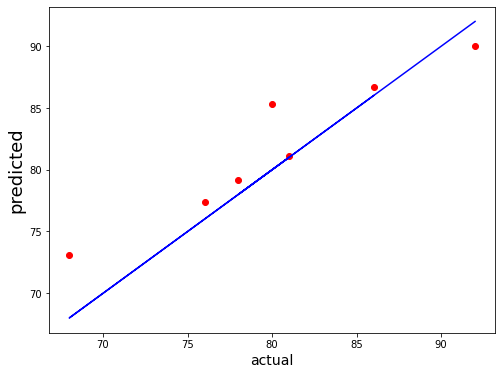

In [98]:
#Linear Gegression

plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_y,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('actual',fontsize=14)
plt.ylabel('predicted',fontsize=18)
plt.show()

best fit line covering most of the data points which shows good for the model

# ensemble technique

In [104]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

parameters={'criterion':['mse','mae'],'max_features':['auto','sqrt','log2']}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'criterion': 'mae', 'max_features': 'auto'}


In [105]:
rf=RandomForestRegressor(criterion='mse',max_features='auto')
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_decision=rf.predict(x_test)

rfs=r2_score(y_test,pred_decision)
print('r2 score:',rfs*100)

rfscore=cross_val_score(rf,x,y,cv=5)
rfc=rfscore.mean()
print('cross val score:',rfc*100)

r2 score: 93.43748550124273
cross val score: 82.24940102838077


we are getting model accuracy is 94.61% and cross validation as 80.64% which shows aur model is performing well

# saving the model

In [106]:
import pickle
filename='baseball_win_pred.pkl'
pickle.dump(rf,open(filename,'wb'))

# conclusion

In [108]:
loaded_model=pickle.load(open('baseball_win_pred.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result)

0.9343748550124273


In [109]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],pred_decision[:]],index=['predicted','original'])
conclusion

,0,1,2,3,4,5,6
predicted,90.8,75.48,69.12,81.47,84.12,77.06,84.74
original,90.8,75.48,69.12,81.47,84.12,77.06,84.74


above prediction from the model, we can say that our model is performing extremly well ,we are getting 94% accuracy

with the help of the model, i learnt how to done EDA